# Travelling Salesman Problem implemented by Genetic Algorithm
- 

In [1]:
#importing all libraries
import random
import numpy as np
import string
import matplotlib.pyplot as plt
import math
import deap
from deap import base, creator, tools 

Working out the genetic algorithm

In [23]:
class Runner:
    def __init__(self, toolbox):
        self.toolbox = toolbox
        self.set_parameters(10, 5, 2)
    
    def set_parameters(self, population_size, iterations, n_matings):
        self.iterations = iterations
        self.population_size = population_size
        self.n_matings = n_matings
    
    def set_fitness(self, population):
        fitnesses = [(individual, self.toolbox.evaluate(individual))
                    for individual in population
        ]
        for individual, fitness in fitnesses:
            individual.fitness.values = (fitness,)
    
    def get_offspring(self, population):
        n = len(population)
        for _ in range(self.n_matings):
            i1, i2 = np.random.choice(range(n), size = 2, replace = False)
            offspring1, offspring2 = \
                self.toolbox.mate(population[i1], population[i2])
            yield self.toolbox.mutate(offspring1)[0]
            yield self.toolbox.mutate(offspring2)[0]
    
    #defining a static method
    @staticmethod
    def pull_stats(population, iteration = 1):
        fitnesses = [individual.fitness.values[0] for individual in population]
        return{
            'i' : iteration,
            'mu' : np.mean(fitnesses),
            'std' : np.std(fitnesses),
            'max' : np.max(fitnesses),
            'min' : np.min(fitnesses)
        }
    def Run(self):
        population = self.toolbox.population(n = self.population_size)
        self.set_fitness(population)
        stats = []
        for iteration in list(range(1, self.iterations + 1)):
            current_population = list(map(self.toolbox.clone, population))
            offspring = list(self.get_offspring(current_population))
            for child in offspring:
                current_population.append(child)
            #resetting fitness
            self.set_fitness(current_population)
            population[:] = self.toolbox.select(current_population, len(population))
            stats.append(Runner.pull_stats(population, iteration))
        return stats, population

In [3]:
creator.create("FitnessMin", base.Fitness, weights = (-1.0,))
creator.create("individual", list, fitness = creator.FitnessMin)

.
- global data/variables
.

In [4]:
random.seed(11);
np.random.seed(121);

INDIVIDUAL_SIZE = 50
NUMBER_OF_CITIES = 50
POPULATION_SIZE = 200
N_ITERATIONS = 1000
N_MATINGS = 50

# Defining Euclidian distance
- cities have coordinates. We find distance between them by adding squares of the difference of x and y coordinates. And then finding the Square root.

In [13]:
def euclidianDistance(x1, y1, x2, y2):
    sq = (x1 - x2)**2 + (y1 - y2)**2
    r = math.sqrt(sq)
    return r

# defining Manhattan Distance
- here we just find the distance by simply adding the relative x and y coordinates

In [6]:
def manhattanDistance(x1, y1, x2, y2):
    dist = abs(x1 - x2) + (y1 - y2)
    return dist

# assigning random city names and plotting them as a 100x100 scatter plot

- assigning city names

In [7]:
cities = [
    ''.join(np.random.choice([c for c in string.ascii_letters], random.randint(5, 12)))
    for i in range(NUMBER_OF_CITIES)
]

- printing the names

In [8]:
for i in range(0, 50):
    print(cities[i])

cviFbtGUIdEP
lVyMNvPPtEnZ
kdesoxEmEUKe
PTymqNhb
ZmIbKhn
oaJNHbjeTtPI
hLrSkqc
ESQMKf
IdcocSKcdIZL
lwPqroQFa
JAcbpMB
OJyUqh
tapdv
SusJIRotCvl
SxdKjnDEhAzh
qfkeKuS
TYnXF
YqQhju
Rlkri
lmqqv
CQzXWxAU
fiIJaqFT
ibqjr
HfAJZacHyXMl
lISOCHWSgQ
eNThwwEkdlzP
hNoWuAOy
tjrJwHZw
AlpvMcCmH
tolnlBLxzdWx
AHjRR
UziVdJ
xOrAoFyOUrjf
rShhMbWxL
eeWTWeVGvrK
eWNutE
QTZEnPgqJ
BEwEbsysmL
QGqVMsdz
MfgxfCoiU
AhZht
KOeYcD
tKwCdJ
vhlbzSkOEuh
mMEYjl
aaOccISbh
paaMkMTMlyp
dZnFHO
eIxeI
fMemt


- printing the coordinates

In [9]:
c = []
for i in range(0, 50):
    c.append(i)
for i in range(0, 50):
    print(c[i])

x = []
y = []

for i in range(0, 50):
    x.append(random.choice(c))
for i in range(0, 50):
    y.append(random.choice(c))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [10]:
for i in range(0, 50):
    print(x[i], "  ", y[i])

13    37
13    19
3    1
30    13
24    11
45    25
25    38
26    41
4    36
36    6
40    2
12    9
49    13
43    28
17    16
21    0
5    49
19    39
21    21
0    18
26    24
48    4
7    4
8    5
15    13
45    37
6    40
0    15
3    0
29    38
31    23
11    23
43    39
35    29
12    8
28    37
32    30
12    36
46    8
49    24
8    11
26    40
41    9
24    19
7    14
25    39
26    15
13    46
0    12
17    10


- preparing to plot

Plotting Cities on graph


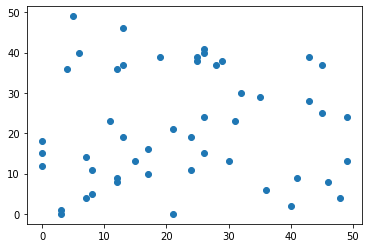

In [11]:
print('Plotting Cities on graph')
plt.scatter(x, y)
plt.show()

calculating distances

In [14]:
distances = np.zeros((NUMBER_OF_CITIES, NUMBER_OF_CITIES))
for city in range(NUMBER_OF_CITIES):
    for to_city in [i for i in range(NUMBER_OF_CITIES) if not i ==city]:
        distances[to_city][city] = \
            distances[city][to_city] = euclidianDistance(x[city], y[city], x[to_city], y[to_city])


In [15]:
toolbox = base.Toolbox()

In [17]:
#permutation setup on individual level
toolbox.register("indices", random.sample, range(INDIVIDUAL_SIZE), INDIVIDUAL_SIZE)
toolbox.register("individual", tools.initIterate, creator.individual, toolbox.indices)

In [18]:
#population setup
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

In [19]:
def EVALUATE(individual):
    summation = 0
    start = individual[0]
    for i in range(1, len(individual)):
        end = individual[i]
        summation += distances[start][end]
        start = end
    return summation

In [20]:
toolbox.register("evaluate", EVALUATE)

In [21]:
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb = 0.01)
toolbox.register("select", tools.selTournament, tournsize = 10)

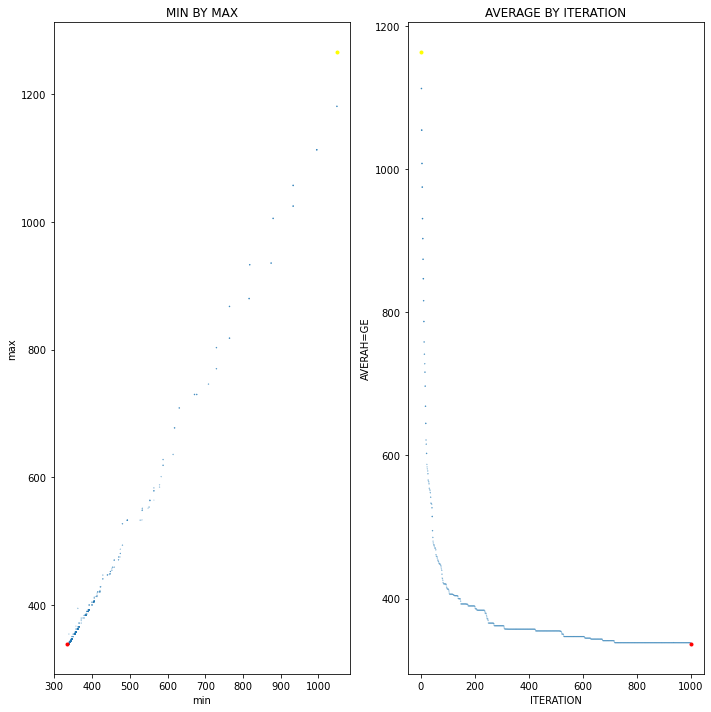

In [24]:
a = Runner(toolbox)
a.set_parameters(POPULATION_SIZE, N_ITERATIONS, N_MATINGS)
stats, population = a.Run()
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
_= plt.scatter([s['min'] for s in stats], [s['max'] for s in stats], marker = '.', s = [(s['std'] + 1) / 20 for s in stats])
_= plt.title('MIN BY MAX')
_= plt.xlabel('min')
_= plt.ylabel('max')
_= plt.plot(stats[0]['min'], stats[0]['max'], marker = '.', color = 'yellow')
_= plt.plot(stats[-1]['min'], stats[-1]['max'], marker = '.', color = 'red')

plt.subplot(1,2,2)
_= plt.scatter([s['i'] for s in stats], [s['mu'] for s in stats], marker = '.', s = [(s['std'] + 1) / 20 for s in stats])
_= plt.title('AVERAGE BY ITERATION')
_= plt.xlabel('ITERATION')
_= plt.ylabel('AVERAH=GE')
_= plt.plot(stats[0]['i'], stats[0]['mu'], marker = '.', color = 'yellow')
_= plt.plot(stats[-1]['i'], stats[-1]['mu'], marker = '.', color = 'red')

plt.tight_layout()

In [25]:
plt.show()

In [26]:
fitnesses = sorted([
    (i, toolbox.evaluate(individual))
    for i, individual in enumerate(population)
], key = lambda x: x[1])

fitnesses[:5]

[(0, 334.170232672984),
 (1, 334.170232672984),
 (3, 334.170232672984),
 (5, 334.170232672984),
 (6, 334.170232672984)]